In [77]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import db_builder.db_handler as dbh

In [78]:
db_params = {
    'user': 'postgres',
    'password': input('Please enter DB pw'),  # enter your DB password
    'host': 'localhost',  # 'localhost' or IP address
    'port': '5432',  # '5432'
    'database': 'ttdatabase', #tensionTerminator
}

In [79]:
toolcheck = dbh.DB_Conn(db_params)
toolcheck.connect()
engine  = toolcheck.get_engine()

Connected to PostgreSQL, DB: ttdatabase


In [80]:
table_name = 'loop'  # Replace 'your_table_name' with the actual name of the table
df = pd.read_sql_table(table_name, con=engine)

2023-11-11 13:35:15,295 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-11-11 13:35:15,297 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-11 13:35:15,298 INFO sqlalchemy.engine.Engine select current_schema()
2023-11-11 13:35:15,298 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-11 13:35:15,300 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-11-11 13:35:15,300 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-11 13:35:15,301 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-11 13:35:15,303 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

In [81]:
df

,id,timestamp,session_length,location,human_labeled,user_id
0,1,2023-09-08 19:12:12.778376,116,MCI,True,6.0
1,2,2023-09-08 19:15:23.051845,132,MCI,True,4.0
2,3,2023-09-08 19:20:38.981489,54,MCI,True,2.0
3,4,2023-09-08 19:21:18.026639,98,MCI,True,10.0
4,5,2023-09-08 19:23:23.087926,101,MCI,True,5.0
...,...,...,...,...,...,...
145,146,2023-10-13 14:17:29.900262,111,MCI,False,NaN
146,147,2023-10-13 14:21:25.791659,89,MCI,False,NaN
147,148,2023-10-13 14:23:25.565298,46,MCI,False,NaN
148,149,2023-10-13 14:24:40.737588,34,MCI,False,NaN


In [82]:
def overview():
    print(f"Die DB enthält {df['timestamp'].count()} Aufzeichnungen, das entspricht {df['session_length'].sum()} Sekunden an Videomaterial:")
    print(f"\t{df['human_labeled'].sum()} Aufzeichnungen sind von Menschen gelabelt ({df.loc[df['human_labeled'] == True, 'session_length'].sum()} Sekunden) ")
    print(f"\t{(df['human_labeled'] == False).sum()} Aufzeichnungen sind von Menschen gelabelt ({df.loc[df['human_labeled'] == False, 'session_length'].sum()} Sekunden)")
    print(f"Videolänge mean: {df['session_length'].mean()} Sekunden")
    print(f"Videolänge median: {df['session_length'].median()} Sekunden")
    print(f"Videolänge min: {df['session_length'].min()} Sekunden")
    print(f"Videolänge max: {df['session_length'].max()} Sekunden")

In [83]:
overview()

Die DB enthält 150 Aufzeichnungen, das entspricht 8583 Sekunden an Videomaterial:
	128 Aufzeichnungen sind von Menschen gelabelt (5987 Sekunden) 
	22 Aufzeichnungen sind von Menschen gelabelt (2596 Sekunden)
Videolänge mean: 57.22 Sekunden
Videolänge median: 44.5 Sekunden
Videolänge min: 5 Sekunden
Videolänge max: 203 Sekunden


In [84]:
grouped_df = df.groupby(df['timestamp'].dt.date)['session_length'].sum().reset_index()

In [85]:
grouped_df['labeled'] = df[df['human_labeled'] == True].groupby(df['timestamp'].dt.date)['session_length'].sum().reset_index()['session_length']



In [86]:
grouped_df = grouped_df.fillna(0)

In [87]:
grouped_df

,timestamp,session_length,labeled
0,2023-09-08,1961,1961.0
1,2023-09-18,4026,4026.0
2,2023-10-13,2596,0.0


In [88]:
df.loc[df['human_labeled'] == True, 'session_length'].sum()

5987

In [92]:
grouped_df['session_length']/60

0    32.683333
1    67.100000
2    43.266667
Name: session_length, dtype: float64

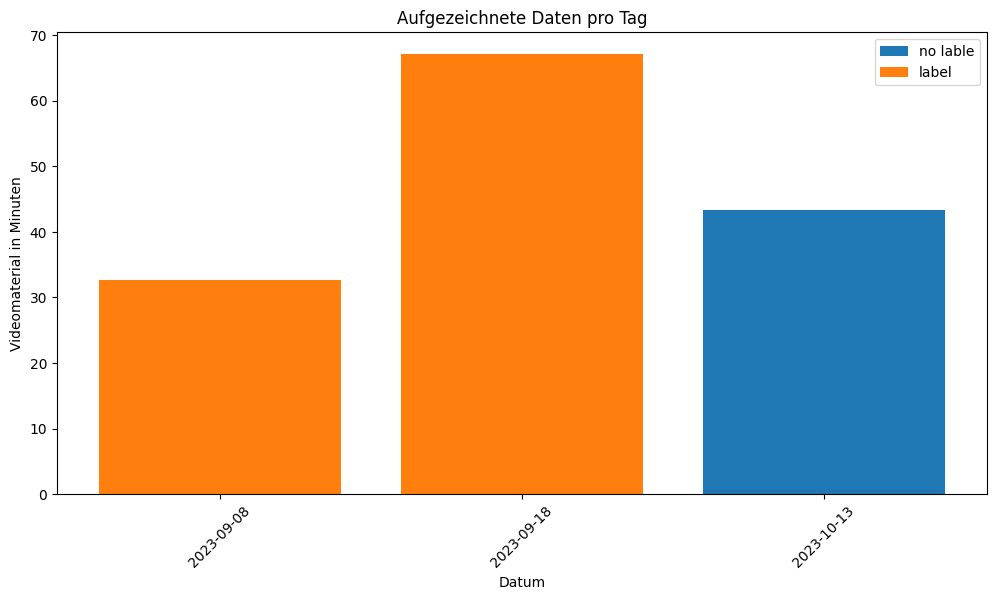

In [93]:
label = ['label', 'no lable']
plt.figure(figsize=(12, 6))

plt.bar(grouped_df['timestamp'].astype(str), grouped_df['session_length']/60, label='no lable')
plt.bar(grouped_df['timestamp'].astype(str), grouped_df['labeled']/60, label='label')
plt.xlabel('Datum')
plt.ylabel('Videomaterial in Minuten')
plt.title('Aufgezeichnete Daten pro Tag')
plt.xticks(rotation=45)
plt.legend()

plt.show()

